# Lab Demonstration - Random Forest
****

### Ensemble Learning

One of the advantages of using decision trees is their simplicity. However, if the tree is small, it will lead to a weak predictor. Their performance may still not up to our expectation. In 1980s, a new method known as Ensemble methods or Ensemble Learning was invented. The core idea of Ensemble Learning is simple. Instead of using just one model to make predictions, we can use many individual models and combine their predictions. This simple idea has been one of the keys in the success of machine learning in producing very accurate models. In this lesson, we will introduce some of the concepts needed for having a high-level of how random forest work. 

### Bootstrap Sampling

If you have a dataset $D$ of $n$ observations, then a bootstrap sample of the dataset will consist of $n$ samples randomly chosen with replacement from $D$. Suppose D = [1,2,3,4,5]; a bootstrap sample would be D* = [5,5,1,2,2]. We see repeated values because the sampling process was done with replacement.

### Bagging 

Bagging comes from bootstrap aggregating, and it is the procedure of taking $K$ bootstrap samples of a dataset and then fitting $K$ models, one in each of the $K$ bootstrap sample datasets.At such, we would have $K$ models. We can aggregate (combine) their individual predictions by applying the majority vote rule in the case of classification. For example, if K=100 and for some observation, 75 out of 100 models classify the observation as "default". The final classification of the Bagging method would be "default". Bagging is the basis for the random forest method that applies a small variation to decorrelate individual predictors.


## Random Forest

They are called forest because the individual predictors are trees. The rationale is this: if your K=100 models will give you a very similar prediction, or the same prediction for all observations, then there is no point of using 100 models because they are giving you the same opinion. Decorrelating the individual predictors means to make sure a bit distinct from one another, so that they can offer a different perspective on the data. The basic mechanism that random forest implements to perform this decorrelation is to use only random sample of the feature in splitting tree.

When a node is split during the construction of the tree, the chosen split is no longer the best split among all features. Instead, the split that is picked is the best split among a random subset of the features. Thus, if we have 15 predictors and the max_features parameter is 5, then only 5 randomly chosen features will be considered for the split. Once all the individual trees have been fit, the majority vote rule is applied to give the final prediction. Since the individual predictors are trees. We need to provide hyperparameters for both the individual trees and the ensemble itself.

***


## Random Forest Classifier

### Defining Dataset

Let's create a dataset with two features (in blue ) and one label (in orange) that contain a record of weather, temperature and the decision to play tennis from the past 14 days. This dataset will be used to build a model to predict whether the weather and temperature today is suitable for you to play a tennis match outdoor. 

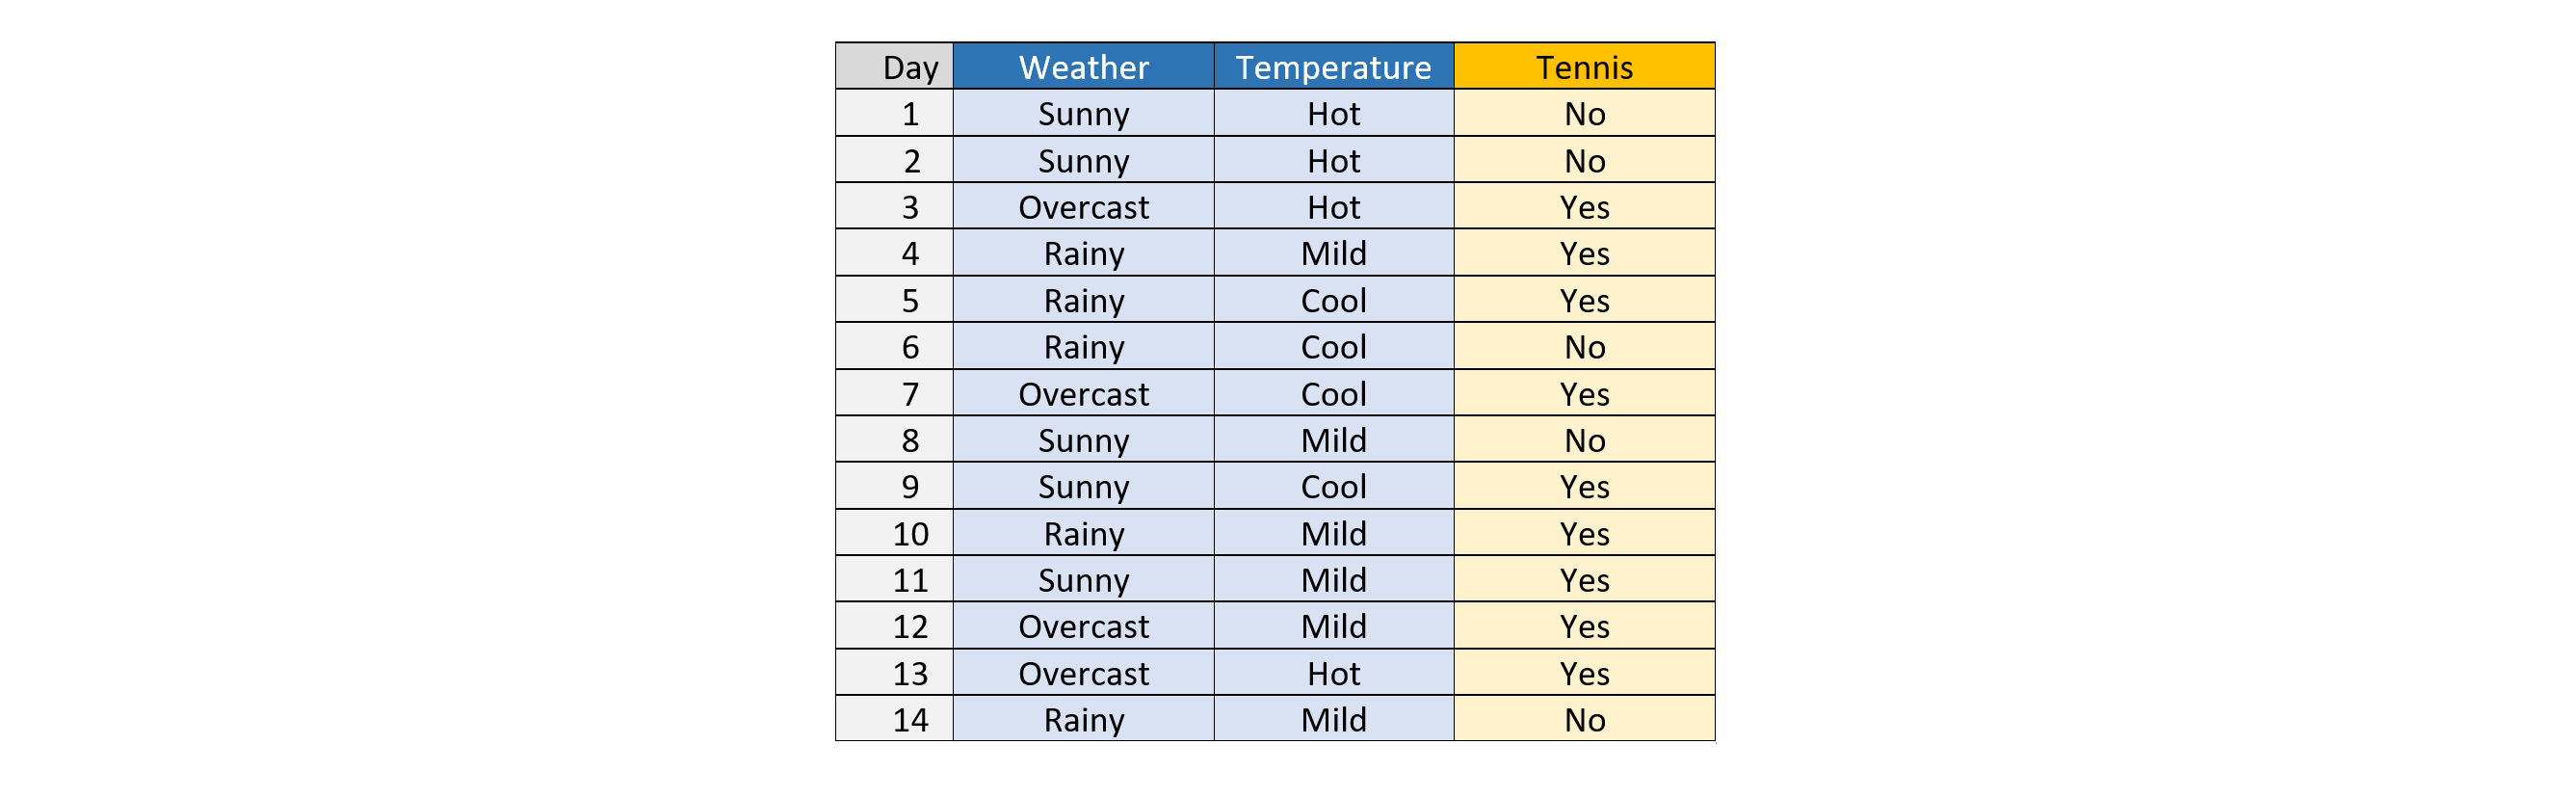


In [7]:
# First Feature
weather = ['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']

# Second Feature
temp = ['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
tennis = ['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']


### Encoding data columns

Various machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column.

In order to encode this data, you could map each value to a number. e.g. Overcast:0, Rainy:1, and Sunny:2.

This process is known as label encoding, and $sklearn$ conveniently will do this for you using $Label Encoder$.


In [8]:
# Importing preprocessing library
from sklearn import preprocessing

# Creating a labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
weather_encoded = le.fit_transform(weather)
print (weather_encoded)


[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


Here, you have imported preprocessing module and created Label Encoder object. Using this $LabelEncoder$ object, you can fit and transform "weather" column into the numeric column. Similarly, you can encode temperature and label into numeric columns.


In [9]:
# Converting string labels into numbers
temp_encoded = le.fit_transform(temp)
label = le.fit_transform(tennis)


### Combining Features

You can combine multiple columns or features into a single set of data using "zip" function.


In [10]:
# Combining weather and temp into a single list of tuples
features = list(zip(weather_encoded, temp_encoded))


### Generating Model

Let's develop our random forest model. You may refer to https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html for the different types of parameters available for random forest classifier. As the hyperparameters present in both individual trees and the ensemble make random forest a bit tricky to optimize, scikit-learn library usually give a good default parameters for you to work on. 

First, import the $RandomForestClassifier$ module and create Random Forest classifier object by passing argument 'n_estimators' that represent the number of trees in the forest. Let's set 'n_estimators' to be 99. For each tree, 'max_depth' defines the  maximum depth of the tree. If it is specified as 'None', then the nodes are expanded until all leaves are 'pure' or until all leaves contain less than 'min_samples_split' samples. For this simple demonstration, we shall set 'max_depth' to 2. The parameter 'random_state' controls both the randomness of the bootstrapping of the samples used when building trees and the sampling of the features to consider when looking for the best split at each node. We shall set the value of 'ransom_state'as 2.  

Next, fit your model on the train set using $fit()$ before you perform your prediction on the test set with $predict()$.


In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=99,
                               max_depth=2,
                               random_state=2)

# Train the model using the training sets
model.fit(features, label)


RandomForestClassifier(max_depth=2, n_estimators=99, random_state=2)

Assume today's weather is overcast and the temperature is mild, let's test the outcome of the Random Forest model to predict wether you should play tennis today. 

In [12]:
# Predict the Output
predicted = model.predict([[0, 2]]) # 0:Overcast, 2:Mild
print (predicted)


[1]


In the above demonstration, you have given input [0, 2], where 0 means Overcast weather and 2 means Mild temperature. Like previous machine learning models, our Random Forest model has also predicts [1], which means today's weather and temperature is suitable for you to play tennis.
